Abastract:
如何完成主成分分析是脉络清晰：首先我们要导入我们要处理的数据，并选择要处理的通道；然后我们需要将数据进行标准化处理，保证每个特征的均值为0，标准差为1。PCA对数据缩放非常敏感，因为它是基于数据的协方差矩阵来查找主成分的。协方差的计算直接受到每个特征尺度的影响。如果数据集中的特征有不同的度量单位或数量级差异较大，那么量级较大的特征会在计算协方差矩阵时占据主导地位，导致PCA分析结果偏向于这些特征。因此，在应用PCA之前，通常需要先对数据进行标准化处理，以确保每个特征贡献相等的权重。这样可以防止PCA结果被某些量级较大的特征所主导，使得分析更加公平和准确；之后我们可以使用cov函数或者手动计算协方差矩阵；在得到协方差矩阵后，我们要分解以得到特征值与特征向量，并选取适当的主成分，组成转换矩阵；然后对原数据进行转换，得到新的数据空间，实现降维，以便后续分析。我们随后对原始空间的数据和转换后数据进行了比较和解读，从原始数据到转换后的数据，我们看到了数据的去相关化。PCA成功地将数据映射到了一个新的坐标系统，其中各个主成分互不相关。
    计算协方差矩阵公式为：C = 1/(n -1) （X - X_mean).T （X - X_mean)
Introduction：
主成分分析是统计学分析中常用的一种数据处理与分析方法，常用于数据降维。通过将数量很多的变量转换为仍包含集合中大部分信息的较少变量来降低数据集的维数，以此以降低精度的代价换取更容易的可视化。主成分分析的数学原理简单概括如下：从一个n维数据集中，找出最具“代表性”的那几个维度，然后降低数据集的维数。至于如何找到最具代表性的维度，我们需要借助线性代数中的特征值和特征向量为工具。在PCA方法中，我们知道：协方差矩阵的特征值和特征向量可以作为选择主成分的工具，因为它们揭示了数据中的主要方差来源。在PCA中，特征值代表了对应特征向量方向上的方差量。较大的特征值对应的特征向量方向上数据的变异性较大，因此这些方向可以视为数据中最重要的成分。具体来说，特征值代表了数据在对应特征向量方向上的方差大小。特征值越大，说明该方向上的变异性越重要；特征向量代表了数据变化的方向，是协方差矩阵变异性的方向指标。每个特征向量是正交的，相互独立，代表了数据在特定方向上的分布。通过这种方式，我们可以既降低维度，又最大地保留变异性。



Method：
首先我们要导入我们要处理的数据，并选择要处理的通道。

In [97]:
import mne
import math
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
# from qpsolvers import solve_qp
from scipy.optimize import minimize
import os
os.environ["QT_PLUGIN_PATH"] = "E:\计算机\python\Lib\site-packages\PyQt5\Qt5\plugins"
# 读取数据
file_name = 'E:\计算机\pycham\A2A\mix_sine_trial\EEG_all_epochs.npy'
data = np.load(file_name)
# print("数据")
# print(data.shape)
train_eeg = data[:5,]
print("数据的前五个通道")
print(train_eeg.shape)
print(train_eeg)


数据的前五个通道
(5, 512)
[[ 184.5070843   182.31637318   41.06444584 ...   40.16428726
   -29.60895458  -84.86153076]
 [ 171.96198926  142.91072735    8.64871514 ...   27.62597514
   -57.17578819 -116.97409977]
 [ 229.56731921  220.78558704  134.22132366 ...   -6.76600303
   -35.31005813 -141.71351487]
 [-108.52222283 -131.98228592 -196.46721387 ... -276.87610943
  -319.45455031 -299.41279676]
 [ -92.514927   -122.76477733  -38.61244152 ...  -69.56031674
  -183.66291015 -246.42285906]]


然后我们需要将数据进行标准化处理，保证每个特征的均值为0，标准差为1。之后我们可以使用cov函数或者手动计算协方差矩阵，在得到协方差矩阵后，分解得到特征值和特征向量。

In [129]:

# 计算每个特征(行)的均值和标准差
mean = np.mean(train_eeg, axis=1, keepdims=True)
std = np.std(train_eeg, axis=1, keepdims=True)

# print(mean)
# 对数组进行标准化,并计算协方差矩阵 cov : covariance_matrix, 手动： cov_matrix
data_standardized = (train_eeg - mean) / std
covariance_matrix = np.cov(data_standardized, rowvar=True)
print('协方差矩阵',covariance_matrix)

# 中心化数据
# data_centered = (train_eeg - mean) / std
# print(data_centered)
# 计算协方差矩阵
# cov_matrix = np.dot(data_centered.T, data_centered) / (data_centered.shape[0] - 1)
# 打印协方差矩阵
# print('协方差',cov_matrix)

# 特征值与特征向量
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print('特征向量',eigenvectors.shape)
print('特征值',eigenvalues)


协方差矩阵 [[ 1.00195695  0.99495547  0.94516004  0.01138413  0.01535339]
 [ 0.99495547  1.00195695  0.9419223   0.0290315   0.02588412]
 [ 0.94516004  0.9419223   1.00195695 -0.05977931  0.0245751 ]
 [ 0.01138413  0.0290315  -0.05977931  1.00195695  0.06588952]
 [ 0.01535339  0.02588412  0.0245751   0.06588952  1.00195695]]
特征向量 (5, 5)
特征值 [2.92431747 0.00678076 0.07069947 0.93818034 1.0698067 ]


随后我们对特征值进行排序，注意特征向量需要对应特征值排序，由此得到所谓的主成分，并用主成分构建转换矩阵G。

In [136]:

# 对特征值进行排序，并获取排序后的索引
sorted_indices = np.argsort(eigenvalues)[::-1]
# 根据排序后的索引重新排列特征值和特征向量
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
# print(sorted_indices)

# 获取前两个特征向量
top_eigenvectors = eigenvectors[:, sorted_indices[:2]]
# 构建变换矩阵
transformation_matrix = top_eigenvectors

# 数据转换
# transformed_data = np.dot(train_eeg, transformation_matrix)
transformed_data_new = np.dot(train_eeg.T, transformation_matrix)
print(transformed_data_new.shape)

(512, 2)


我们使用矩阵G，对原数据进行转换，然后同时可视化原始数据和转换后数据。

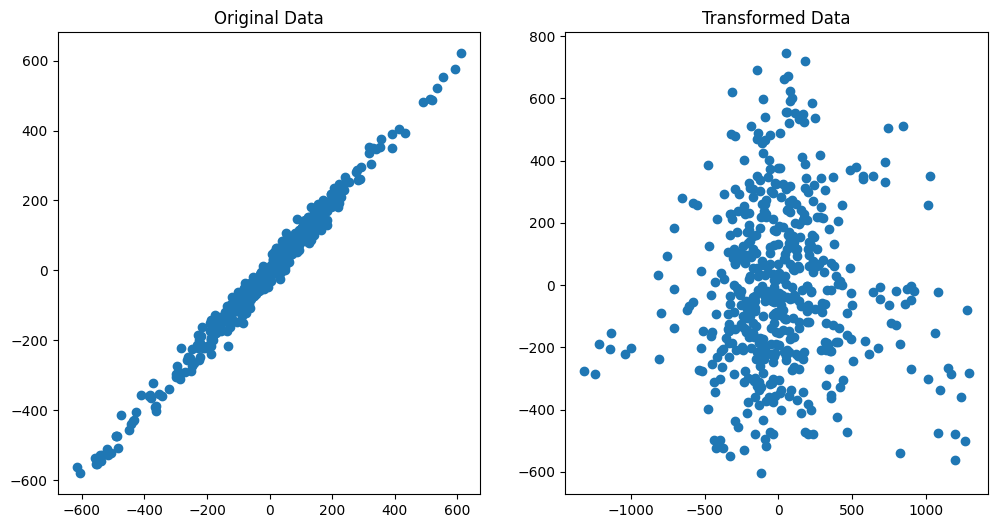

In [138]:

# 可视化
plt.figure(figsize=(12, 6))

# 原始数据可视化
plt.subplot(1, 2, 1)
# plt.scatter(data[:, 0], data[:, 1])
plt.scatter(train_eeg[0,:], train_eeg[1,:])
plt.title('Original Data')

# 转换后的数据可视化
plt.subplot(1, 2, 2)
# plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.scatter(transformed_data_new.T[0,:], transformed_data_new.T[1,:])
plt.title('Transformed Data')

plt.show()

results：
观察数据我们可以发现，原始数据点呈现出一个明显的线性趋势，表明至少有一个变量与其他变量具有很强的线性关联。数据分布沿一个主方向拉伸，这可能因为一个主导的变量或成分在数据集中的作用。经过PCA转换后，数据点在第一个主成分的方向上分布更为分散，这说明PCA旋转了数据空间，使得方差最大的方向成为了新的坐标轴。第一个主成分捕获了数据的主要变异性，而第二个主成分的变异性明显小得多。转换后的数据呈现出一种较为圆形或椭圆形的分布，这是因为PCA将数据去相关，试图将原始数据变量之间的关系解耦。
在新的坐标系中，数据点不再沿着一个单一的线性关系排列，而是围绕原点均匀分布，表明主成分之间没有线性相关性。

conclusion & discussion：
我们使用的数据是一段干净的脑电信号，因为短时间并没有找到合适的数据，这使我们最后应用PCA方法之后并没有很好的可解释性。我们在运用PCA的过程中发现，困扰我们最大的一步并不是过程中算法的完成，而是最后对结果的解释，反退回前面的步骤就是选取行还是列作为特征的问题。我们最终想要研究的是通道的差异性，还是通道中每个元素的差异性？这是一个很重要的问题，我们甚至觉得这是整个PCA分析的核心内容，完成这一步的选择，之后的操作就是流程化的了。


IndexError: index 1 is out of bounds for axis 1 with size 1

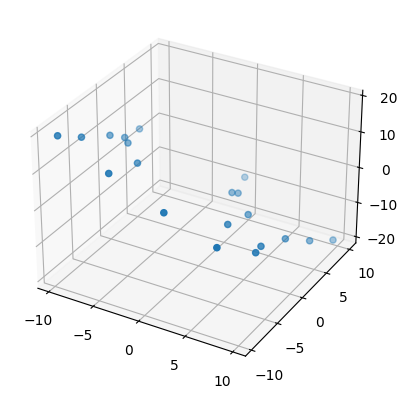

In [92]:
# 导入库
import numpy as np
import matplotlib.pyplot as plt
import scipy
# 定义平面
def plane(x, y):
    return -(x + y)


# 算数据
d = 3
n = 20
xx = np.random.uniform(low=-10.0, high=10.0, size=[1, n])
yy = np.random.uniform(low=-10.0, high=10.0, size=[1, n])
zz = plane(xx, yy)

# 构建数据集
X = np.zeros([d, n])
X[0, :] = xx
X[1, :] = yy
X[2, :] = zz
X = X.T
# 构造H
H = np.eye(n)-(1/n)*np.dot(np.ones([n, 1]), np.ones([1, n]))

# 协方差矩阵S = X'*H*X
S = np.dot(np.dot(X.T, H), X)

# 特征值与特征向量
lam, v = np.linalg.eig(S)

# 特征值按大小排序
lam = sorted(np.abs(lam), reverse=True)

# 重新计算特征向量
v1 = scipy.linalg.null_space(S - lam[0]*np.eye(d))
v2 = scipy.linalg.null_space(S - lam[1]*np.eye(d))

# 变换矩阵构建
G = np.hstack((v1, v2))

# 变换后的数据
Y = np.dot(X, G)
# 创建图像
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# 画曲线
ax.scatter(xx, yy, zz)
ax.scatter(Y[:, 0], Y[:, 1], np.zeros(n))

# 显示
plt.show()